In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import nltk
from nltk import pos_tag
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud, STOPWORDS
import re, string, unicodedata
from string import punctuation

# import warnings
# warnings.filterwarnings('ignore')

## Data Loading

In [2]:
df = pd.read_csv(r'G:\ML projects\IMDB-Dataset.csv', encoding = 'latin-1')

## Data Cleaning and Preprocessing

In [3]:
stop_words = stopwords.words('english')
new_stopwords = ["would", "shall", "could", "might", "film", "movie", "director", "scene", "character", "actor", "actress"]
stop_words.extend(new_stopwords)

negations_and_sentiment_words = ["not", "no", "never", "n't", "none", "good", "bad", "love", "hate"]

for word in negations_and_sentiment_words:
    if word in stop_words:
        stop_words.remove(word)

stop_words = set(stop_words)
print(stop_words)

{"isn't", 'while', 'what', 'themselves', 'needn', 'film', 'with', 'might', 'each', 'nor', "aren't", 'off', 'is', 'actor', 'as', 'through', 'ain', 'above', 'y', 'when', 'ours', 'ourselves', 'all', "shouldn't", "didn't", 't', "you're", 'myself', 'him', 'mustn', 'at', 'does', "should've", 'my', 'into', 'couldn', 'who', 'whom', 'won', 'been', 'd', 'movie', 'they', 'there', 'further', 'me', 'did', 'of', 'don', 'below', 'to', 'should', 'isn', 'between', 'here', 'being', 'had', 're', 'o', 'doesn', 'his', 'in', 'shan', 'until', 'director', 'the', 'under', 's', 'our', 'over', 'from', 'most', 'about', 'we', 'few', "won't", 'so', 'you', 'mightn', "you'd", 'how', 'were', 'aren', 'character', 'an', 'i', 'yourself', 'shouldn', "hasn't", 'for', 'where', "hadn't", 'he', 'doing', 'ma', 'hasn', 'down', 'has', 'yourselves', 'would', 'this', 'do', 'same', 'on', 'that', "wasn't", 'a', "weren't", 'scene', "wouldn't", 'or', "you'll", 'hadn', 'be', 'any', 'didn', 'your', 'more', 'll', 'm', 'against', 'own', '

In [4]:
'''-----------------------------Data Cleaning and Preprocessing pipeline----------------------------------'''

#Removing special character
def remove_special_character(content):
    return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)

# Removing URL's
def remove_url(content):
    return re.sub(r'http\S+', '', content)

#Removing the stopwords from text
def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    '''content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)'''
    return content

#Data preprocessing
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)
    
    content = remove_stopwords(content)    
    return content

<>:5: SyntaxWarning: invalid escape sequence '\W'
<>:5: SyntaxWarning: invalid escape sequence '\W'
C:\Users\user\AppData\Local\Temp\ipykernel_20960\1565661177.py:5: SyntaxWarning: invalid escape sequence '\W'
  return re.sub('\W+',' ', content )#re.sub('\[[^&@#!]]*\]', '', content)


In [5]:
pd.options.display.max_colwidth = 1000
#Data cleaning
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)
df.head(3)

,Ratings,Reviews,Movies,Resenhas,Reviews_clean
0,1.0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",Disaster Movie,"* IsenÃ§Ã£o de responsabilidade: eu sÃ³ assisti esse filme como um acordo condicional. E eu vejo filmes de graÃ§a. Eu nÃ£o seria pego morto dando meu dinheiro suado a esses idiotas. Bem, para explicar a profundidade desse 'filme', eu poderia escrever minha crÃ­tica mais curta de todos os tempos. NÃ£o vÃª este filme. Ã de longe o filme mais estÃºpido, lamenta, preguiÃ§oso e inacreditavelmente UNFUNNY que eu jÃ¡ vi. Ã um desastre total. Mas como o meu Ã³dio por este filme e por outros, se estende muito alÃ©m de uma exibiÃ§Ã£o, acho que vou continuar um pouco. NÃ£o conheÃ§o nenhuma das pessoas do filme alÃ©m de Carmen Electra, Vanessa Minnillo, e Kim Kardashian, mas isso nÃ£o importa. Eles sÃ£o todos horrÃ­veis, embora eu ache que esse seja o ponto. A ediÃ§Ã£o Ã© horrÃ­vel e, possivelmente, erros de continuidade flagrantes tornam essa porcaria ainda mais horrÃ­vel do que eu pensava. Agora eu sei que esses filmes nÃ£o devem ser sÃ©rios, mas vamos lÃ¡, Ã© o cinema 101 que se alguÃ©m f...",disclaimer watched conditional agreement see films free not caught dead giving hard earned money idiots well explain depth write shortest review ever not see far stupidest lamest lazy unbelievably unfunny ever seen total disaster since hatred others like extends far beyond one viewing think go bit not know people besides carmen electra vanessa minnillo kim kardashian not matter horrible though think point editing flat horrible possibly blatant continuity errors make crapfast even crappier thought know films not supposed serious come making someone gets minor facial cut next shot someone gets cut sword blood least cut though since narnia films get away give disaster pass jokes thoughtless mindless physical gags obviously take popular movies last year late well including best picture nominees know saddest thing stupid movies not care much money make many cameos sorry ass excuses films taking away jobs actors writers directors truly deserve attention lionsgate thought better taste ash...
1,1.0,"I am writing this in hopes that this gets put over the previous review of this ""film"". How anyone can find this slop entertaining is completely beyond me. First of all a spoof film entitled ""Disaster Movie"", should indeed be a spoof on disaster films. Now I have seen 1 (yes count them, 1) disaster film being spoofed, that being ""Twister"". How does Juno, Iron Man, Batman, The Hulk, Alvin and the Chipmunks, Amy Winehouse, or Hancock register as Disaster films? Selzterwater and Failburg once again have shown that they lack any sort of writing skill and humor. Having unfortunately been tortured with Date Movie and Epic Movie I know exactly what to expect from these two...no plot, no jokes just bad references and cheaply remade scenes from other films. Someone should have informed them that satire is more than just copy and paste from one film to another, though I shouldn't say that because some of these ac

## Data Overview

In [6]:
#Checking for missing value
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Resenhas          0
Reviews_clean     0
dtype: int64

In [7]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [8]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149755
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [9]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149755
Unique movie names:14206
No of ratings:150000


## Exploratory Data Analysis (EDA)

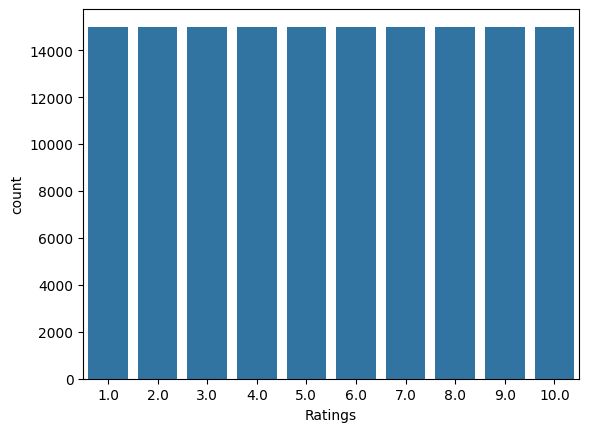

Ratings
1.0     15000
2.0     15000
4.0     15000
3.0     15000
5.0     15000
6.0     15000
8.0     15000
7.0     15000
10.0    15000
9.0     15000
Name: count, dtype: int64


In [10]:
#Checking for Class Imbalance 
sns.countplot(x=df['Ratings'])
plt.show()
print(df['Ratings'].value_counts())

(np.float64(-0.5), np.float64(1199.5), np.float64(599.5), np.float64(-0.5))

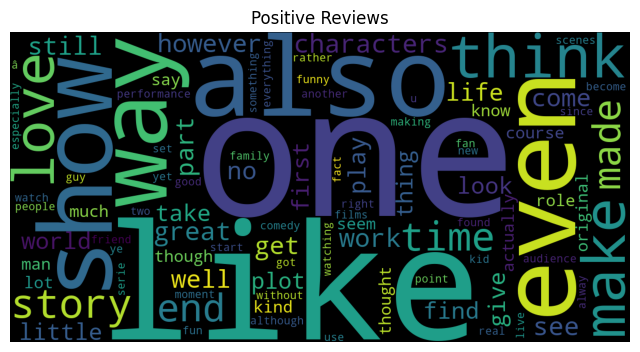

In [11]:
'''----------------------------Visualization of Important Words from Positive Reviews--------------------'''
sentences=df['Reviews_clean']
pos=' '.join(map(str,sentences[df['Ratings']>=7]))
neg=' '.join(map(str,sentences[df['Ratings']<=4]))
  
pos_wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(pos) 

plt.figure(figsize=(8,8))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')
plt.axis('off')

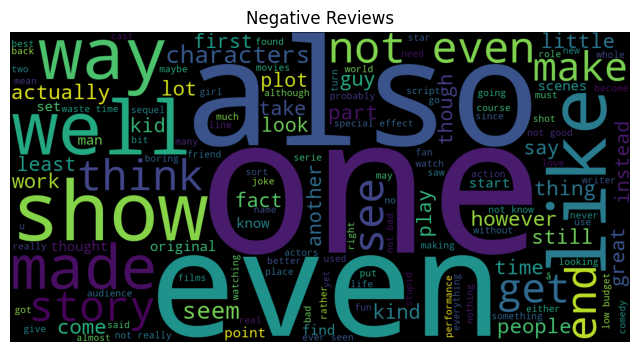

In [12]:
neg_wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 15).generate(neg) 

plt.figure(figsize=(8, 8))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')
plt.axis('off')
plt.show() 

## Basic Statistic of Review data

48406      917
90001     1421
90002      454
90003     1607
90004      568
          ... 
149995    3329
149996     321
149997    1482
149998    1332
149999     404
Name: Reviews_clean, Length: 60000, dtype: int64


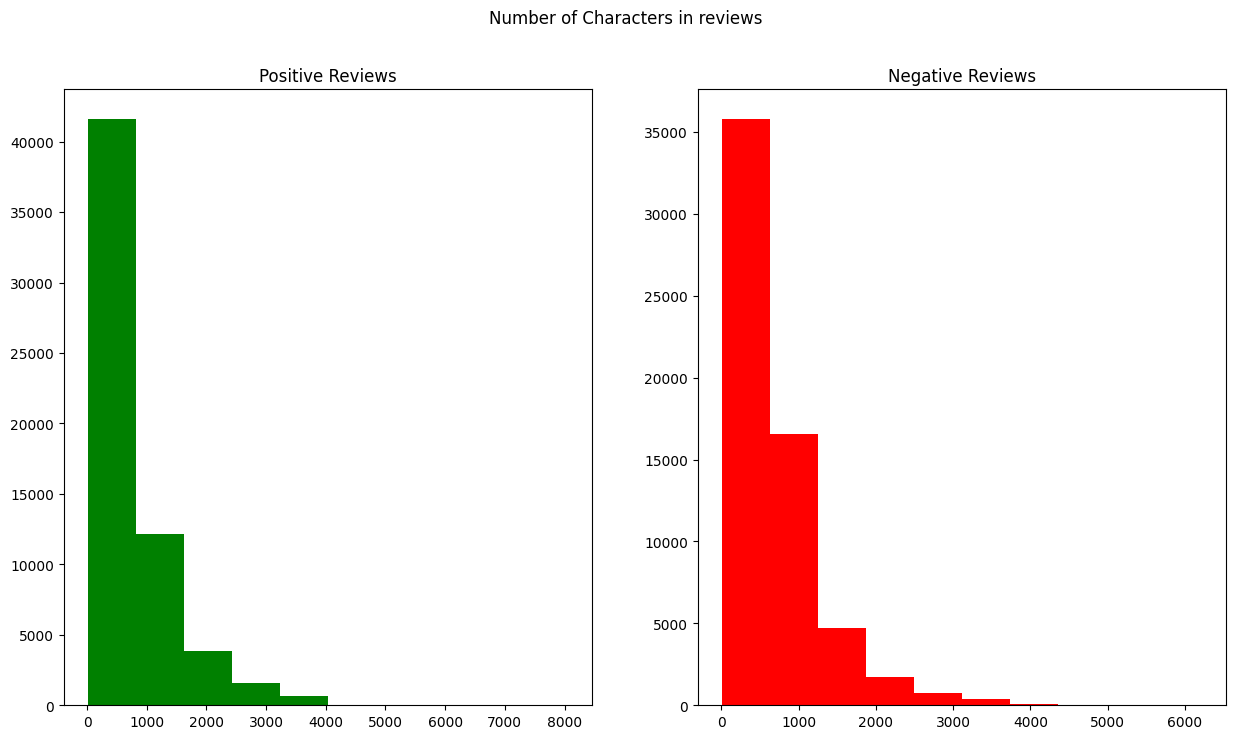

In [13]:
#Visulaization of number of charactor in reviews
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15,8))

len_pos_review = df[df['Ratings']>=7]['Reviews_clean'].str.len()
print(len_pos_review)
pos_ax.hist(len_pos_review, color = 'green')
pos_ax.set_title('Positive Reviews')

len_neg_review = df[df['Ratings']<=4]['Reviews_clean'].str.len()
neg_ax.hist(len_neg_review, color = 'red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Number of Characters in reviews')
plt.show()

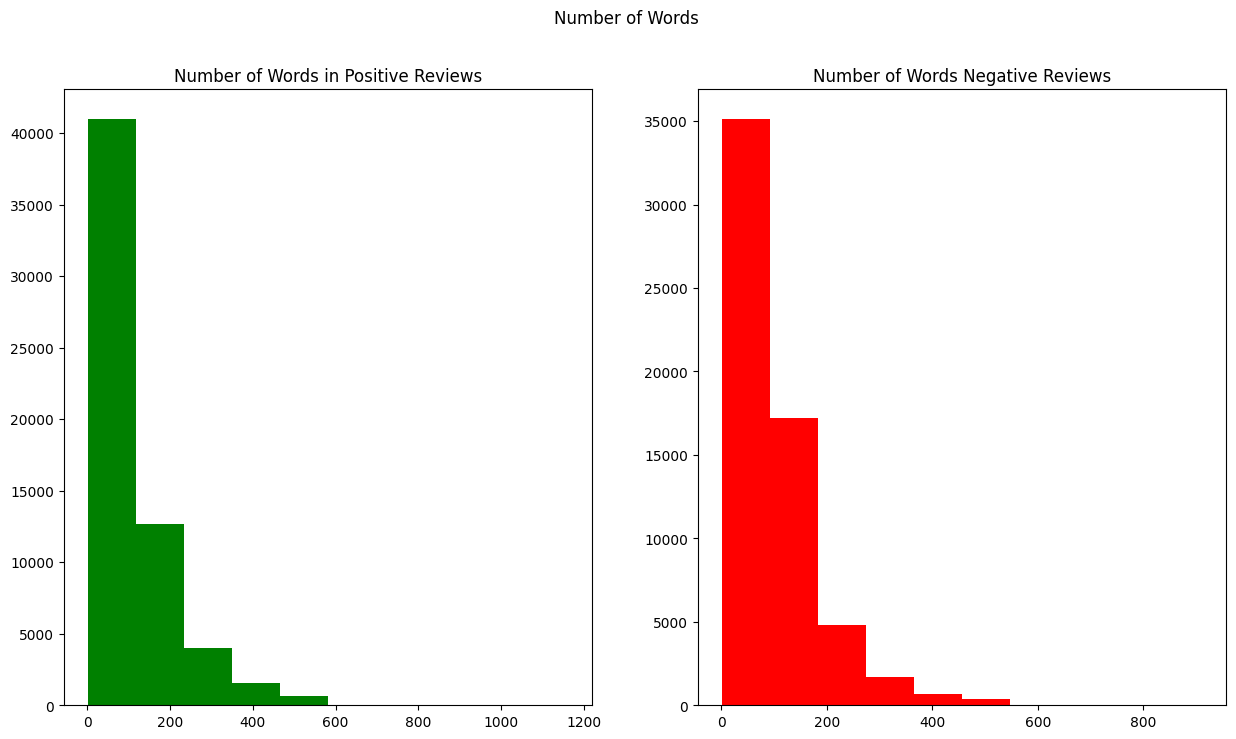

In [14]:
#Visulaization of number of words in reviews
figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15,8))

pos_word = df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word, color = 'green')
pos_ax.set_title('Number of Words in Positive Reviews')

neg_word = df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word, color = 'red')
neg_ax.set_title('Number of Words Negative Reviews')

figure.suptitle('Number of Words')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_20960\1657385495.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(pos_word.map(lambda x: np.mean(x)), ax = pos_ax, color = 'green')
C:\Users\user\AppData\Local\Temp\ipykernel_20960\1657385495.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(neg_w

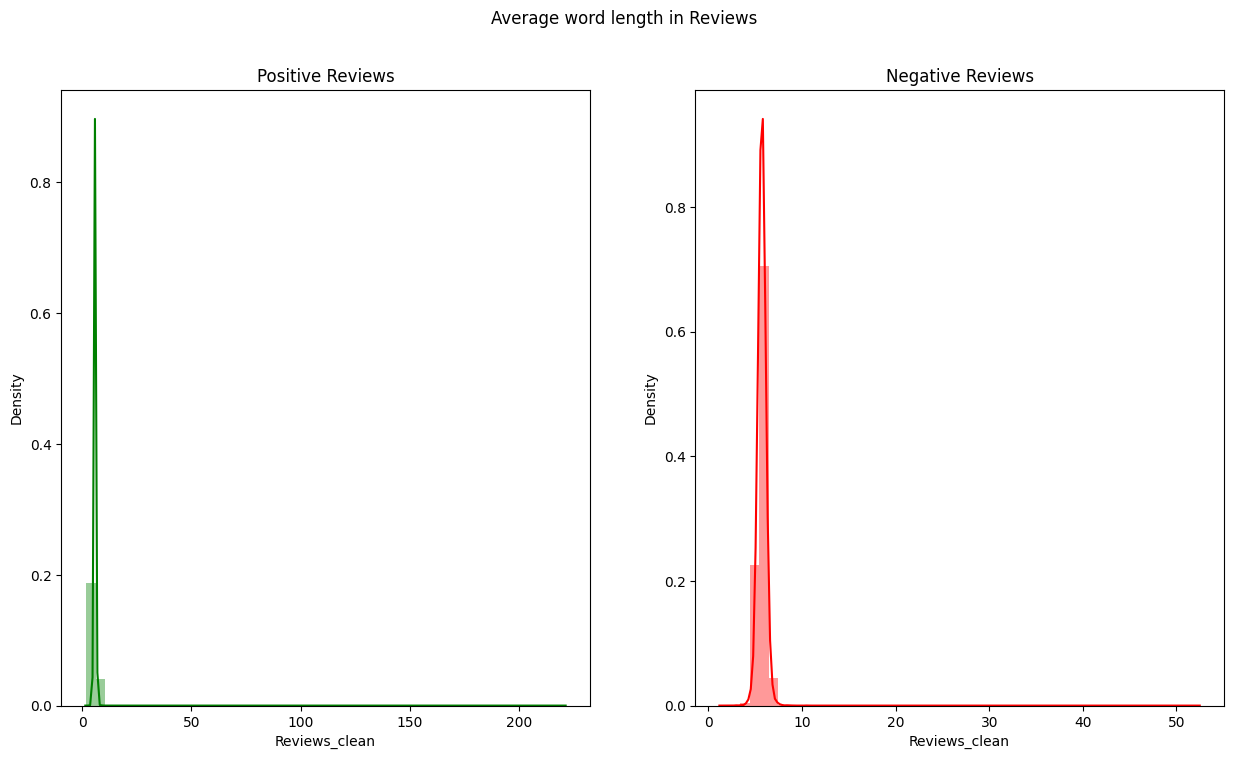

In [15]:
#Visulaize average of words in reviews

figure, (pos_ax, neg_ax) = plt.subplots(1, 2, figsize=(15, 8))

pos_word = df[df['Ratings']>=7]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(pos_word.map(lambda x: np.mean(x)), ax = pos_ax, color = 'green')
pos_ax.set_title('Positive Reviews')

neg_word = df[df['Ratings']<=4]['Reviews_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(neg_word.map(lambda x: np.mean(x)), ax = neg_ax, color = 'red')
neg_ax.set_title('Negative Reviews')

figure.suptitle('Average word length in Reviews')
plt.show()

In [16]:
#Get important feature by using Countvectorizer
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range = (g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7], 20, 1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon Words in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [18]:
most_common_bi = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [19]:
most_common_tri = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7], 20, 3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Positive Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [20]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=7)&(df['Reviews'].str.contains("not know| not like| not really| not take seriously| not get wrong"))].head(5)

,Reviews,Ratings,Movies
90042,"Way of the Vampire begins around the turn of the 20th Century in England. Abraham Van Helsing (Rhett Giles), who is immortal here, has assembled a ""gang"" of vampire slayers (no, they're not a Scooby gang like Buffy's). In the first few minutes, the gang is slaughtered, but Van Helsing decapitates Dracula. Dracula's ""gang"" is left in temporary chaos. The ""Prince"" who will replace him, Sebastien (Andreas Beckett), was mistaken by Van Helsing for an eligible member of his gang. Unfortunately, he left Sebastien with his wife, who Sebastien turned into a vampire while Van Helsing was out earning the bacon.The opening credits roll, and we are propelled into ""The Present"". Van Helsing has moved to Los Angeles (to try to jumpstart a film career?) and naturally so has Sebastien and his current gang. We can all guess the kind of chaos that will ensue.First off, whoever did the sound mix for this film--for the DVD in general, for that matter--should to be looking for another job, pronto. Even...",7.0,Way of the Vampire
90059,"This wasn't a bad diversion if you didn't mind not recognizing anybody but Jeff Fahey. It's what you'd expect in most ways. The Special Forces are called in when Russian mafia try to steal what they think is nuclear fuel, only of course, to have it turn out to be something far more dangerous and unpredictable. I tend to think one CG monster is like the next, except in terms of how cleverly it thinks. I like this one. He was in places I didn't expect (others I did) but most of the time it did what it was asked -- it made sweaty palms. My complaint and it's not really a complaint is not knowing who anybody is. I always like seeing familiar faces. I liked Jo-Bourne Taylor, and there's a guy early on who comes and goes very quickly but the rest are adequate unknowns.",7.0,Scorpius Gigantus
90104,"The only wrong thing this game did is, it came from wrong hands.\nThe reputation of Metal Gear series has been misused.This game may not be having much of story other than Survival in an isolated dimension, build and defend whatever you've got and hope to escape.\nThis may look like summary but this is it!But thing I would really appreciate is the gameplay(that's why I gave 7)\nThis game really understood the concept of surviving which you can clearly see in the game.This game have a terrible start for series lovers and survival lovers but this goes smooth with time.\nStarting from nothing, find, gather, craft, build, defend, expand, grow, fight, save, and at last survive. This game has some repeating process of collecting, eating and fighting but that's really the concept of survival isnt it.\nThis may look boring but it will get interesting with time!!\nMultiplayer is fine. Nothing really different than others but works great if you have some good teammates.Forgot to say there ar...",7.0,Metal Gear Survive
90111,"Although Laser Moon's exposure of female nudity seems a little too much, I think this movie perfect for one of these dreadful long distance flights. It entertains throughout, has its tense built up well. Its plot is easy to understand, and never touches any deep issue. Built around a nightly radio program, Laser Moon's story ends with Traci Lords killing a murderer. Traci does not really stand out here, only giving an average performance. The most memorable role in Laser Moon comes from the girl with the long brown curly hair, harassing the radio-operator.Laser Moon is not a movie to make a run for, but when it falls in your lap it certainly isn't bad either.",7.0,Laser Moon
90181,My mom had picked me and my sisters up a bunch of the cards at the flea market and when she gave them to me I did not know who the heck they were but she told me I loved them when I was little.Just a few days ago I was flicking threw channels and came across The Garbage Pail Kids movie so decided to watch it and I think it is OK and my 18 month old son and 4 year old cousin loved it.It is something tha

In [21]:
most_common_fours = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7], 20, 4)
most_common_fours = dict(most_common_fours)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_fours.keys())
temp["Count"] = list(most_common_fours.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Positive Reviews', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

In [34]:
most_common_fives = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7], 20, 5)
most_common_fives = dict(most_common_fives)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_fives.keys())
temp["Count"] = list(most_common_fives.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Positive Reviews', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

In [35]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("la la la | blah blah blah | mario mario mario"))].head(5)

,Reviews,Ratings,Movies
135372,"When you ask casual movie fans what their favorite movie is, you might get an answer like this: ""Uh..I dunno...Jurassic Park 2 was cooler than the first... but Gladiator had people getting their heads cut off... and Scary Movie rocked, man... that movie is so funny."" So what the hell do they mean? Well, beats me. Not too long ago, we were having a ""philosophical"" conversation about movies, when the subject came to Sci Fi. We were arguing which one was the best. One of my friends said, ""Well, I gotta admit, the first Star Wars is a classic, but the prequel has its moments."" I swear a tear came to my eye. I never thought I'd have this kind of conversation with one of my friends.My point here is that Alien Armageddon is a classic even to people who don't know Casablanca from Scooby Doo. It has everything you could possibly want: action, romance, cool creatures, quotable dialogue, a great score and many memorable moments. (Seriously, though, I don't mind aliens.) All this in a non-viol...",10.0,Alien Armageddon
136232,"loose plot, loose dialog, total and unabashed fluff, which is exactly what John Derek did best.you don't go judging a model by her brains. so don't go judging this movie w/intellect. just look.'nuff said.but this site wants more lines of text.so blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah blah",10.0,Bolero
139910,"This movie, singlehandedly, saved my marriage. mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario mario",10.0,Super Mario Bros.
141015,"WOO! THIS MOVIE IS Awesome! I especially like MAX ELLIOT SLADE!! WOOT! My favorite ninja!! Anywho, it't really great, this movie and I recommend it for children... Don't ask why I watched it... I don't wanna grow up 0__0; DON'T LAUGH!!!!!!!! ><;; Now since I need ten lines of comments... La la la la la la la la la la la la la lala la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la *cough* la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la la.... Later!!",10.0,3 Ninjas Kick Back


In [36]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']>=9)&(df['Reviews'].str.contains("bad review"))].head(5)

,Reviews,Ratings,Movies
120211,"This movie was a blast for my little guys, they loved every minute of it, I have read all of the bad reviews, and could not disagree more. This movie, is pure and good. There is just enough action to keep the kids interested, and not so much that you leave the theater with them bouncing off the walls either. It is funny with jokes that everyone can appreciate. I think people have gotten used to so much violence and adult content in our kids movies that they are disappointed when it is missing, like the movie wasn't entertaining enough for the parents. Well, NEWS FLASH.....It's a kids movie, and a perfect one at that. Kids need these kinds of movies, not Spongebob and the like which are more to entertain the parents.",9.0,Doogal
120238,"I am a huge horror buff and prefer pieces that delve into the characters psychological issues. This film was awesome on so many levels, the acting and writing were fantastic and creepy and I was afraid or and empathetic with the murderer the whole time. What an interesting study on the line between sick and a danger to others, and the line between being a mean girl and being psychotic. Set in a great location, a house full of creepy art, in the winter in Conneticut and with amazing performances from many of my favorite actresses. It actually shocks me that others have given this such a bad review, I loved this movie, I guess it goes to show you everyone will have a different opinion but I say don't miss this film!",9.0,#Horror
120239,"No idea why there are so many bad reviews here? I loved it; I thought it was a very advanced thoughtful film. The graphic were #killer. The comparison of video game culture and young girl culture was spot on. This film makes connections that I've never seen on the big screen but, do see in every day life.The casting was spot on, Hello 12 year-old girls are supposed to be a little annoying. I do wish that more directors would take color into more consideration the way this film does. T The highly stylized sets make the murder scenes more believable because everything is so unbelievable. How can you live in 2016 and not ""get""a film about social media and accelerationism. #duh Someone explain this to me.",9.0,#Horror
120273,"What do you get when you cross Love Story with Star Wars with Blade Runner with Back to the Future with MTV? Love Story 2050, that's what. What a fun movie for the entire family. This fantasy of epic proportions is much, much better than AI, a similar sci-fi classic. The thrills are non-stop in this blockbuster, from its lead off car chase to bike racing stunts to the vantage point of a moving roller coaster to speeding hover-craft--you will be on the edge of your seat from beginning to end. The version I saw was only partially in English and I still was glued to the screen. I can't wait to see a version with subtitles. The mega budget special effects are out of this world and highly convincing. The future vision of XBox was hilarious. Those who are complaining about how long this movie is simply don't understand Bollywood. The three hours went by quickly; it seemed to be only an hour. There could have been a better twist with the Darth Vader character. For example, I suspected tha...",9.0,Love Story 2050
120334,"I don't understand the negative reviews for this movie.This deserve a 10 stars.Something is definitely wrong with people when they do not care for a positive message in a movie.This movie was beyond great,had a touch of everything.It shows what can happen when a person's influence can change lives.These young boys had no hope,they could not see a promising future.The streets are what they knew,and of course,some of you can't relate, but if you are a fair person,then you will try to understand it from that viewpoint.I was not raised in a bad neighborhood,nor the streets, and i still totally get this movie.Life is about sacrifices and there were many a lessons in this movie that are based on real life for s

In [37]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4], 20, 1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon words in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [38]:
most_common_bi = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4], 20, 2)
most_common_bi = dict(most_common_bi)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_bi.keys())
temp["Count"] = list(most_common_bi.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon bigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [39]:
most_common_tri = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4], 20, 3)
most_common_tri = dict(most_common_tri)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_tri.keys())
temp["Count"] = list(most_common_tri.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon trigram in Negative Reviews', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [40]:
most_common_fours = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4], 20, 4)
most_common_fours = dict(most_common_fours)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_fours.keys())
temp["Count"] = list(most_common_fours.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 4-gram in Negative Reviews', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

In [41]:
most_common_fives = get_top_text_ngrams(df.Reviews_clean[df['Ratings']<=4], 20, 5)
most_common_fives = dict(most_common_fives)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_fives.keys())
temp["Count"] = list(most_common_fives.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Commmon 5-gram in Negative Reviews', orientation='h', 
             width=1000, height=700,color='Common_words')
fig.show()

In [42]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("saturday night friday"))].head(5)

,Reviews,Ratings,Movies
7055,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning NO STARS End of Days A made for TV biopic of the pop icon Britney Spears (Natasha Bassett), from starting out with her breakthrough single Baby One More Time in 1999, where she was shoved into the limelight by her pushy mother Lynne (Nicole Oliver) and domineering manager Larry Rudolph (Peter Benson), who both naively thought she was old and mature enough to handle such massive media exposure and pushed her to lie about her virginity to keep up an illusion, through to the trials and turbulence of her relationships with Justin Timberlake (Nathan Keyes) and Kevin Federline (Clayton Chitty), before a revealing 2008 documentary aired.Sometimes, something can give you a really bad vibe, yet you still feel utterly compelled to see it. Your instinct can tell you it looks really bad, and you can see no end of bad reviews, and you can almost write a review before you've even seen it, but ...",1.0,Britney Ever After
17427,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday MorningWill (Joey Pollairi) is the new guy in high school, who stands out as a prime target for bullies. He soon makes friends with Jay (Zach Pearlman), Simon (Bubba Lewis) and Neil (Mark L. Young), three other social misfits who are not complete dorks but far from the coolest kids in school, either.It always spurs you on as a Brit when something home grown becomes a success, as I imagine it probably does for anyone from a small country that's not at the centre of the world (not anymore, anyway.) But it's a sad thing and a sign of the times when the only way to tell what a massive success it's been is when the Americans go and remake it. In fact, this is almost inevitable. And, inevitably, a whole lot worse.The best way I can describe The Inbetweeners USA is: imagine you've just read a really great Stephen King novel, and then see a film adaptation of it that is just like what you've rea...",2.0,The Inbetweeners
17818,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning The premise behind this abysmal action thriller has a group of people going for a good old bit of paint ball, only to find themselves really fighting to stay alive as a barrage of real bullets are fired at them. But the characters are never developed or explored in any way, so it's impossible to care about any of them. Needless to say, there is no air of tension or suspense whatsoever, and the acting is so bad none of them have any life anyway, as though just running around shouting and screaming incoherently at each other gives them any life. Not that there was anything special to see there anyway, just the usual generic stereotypes typical for this genre. And here we have yet another film that hasn't learned the modern trend of shaking the camera around and darkening the lens is an off putting and annoying one rather than an endearing one. One to flee all round. *",2.0,Paintball
18138,"STAR RATING: ***** Saturday Night **** Friday Night *** Friday Morning ** Sunday Night * Monday Morning I could go to great pains to write a long, in depth review of The Last Seven, but it's hard to write much more about it other than my summary above. Right from the opening sequence, with one of the lead characters wondering around a deserted London shouting out for 'anybody!', just like in the aforementioned film, it just feels like such a pale imitation of it that it hurts. In fact, it's almost as if the director knew he was practically copying it scene for scene and just gave up bothering to tell any sort of decent story of his own. As such, it just goes through the motions of the post apocalyptic thriller genre, with the usual stereo-typical set up and characters, without firmly establishing the back story behind the majority of humanity being wiped out and making no sense. Most baffling

In [44]:
pd.options.display.max_colwidth = 1000
df[["Reviews","Ratings","Movies"]][(df['Ratings']<=4)&(df['Reviews_clean'].str.contains("good | great | awesome | best"))].head(30)

,Reviews,Ratings,Movies
0,"*Disclaimer: I only watched this movie as a conditional agreement. And I see films for free. I wouldn't be caught dead giving my hard earned money to these idiots.Well, to explain the depth of this 'film', I could write my shortest review, ever. Don't see this movie. It is by far the stupidest, lamest, most lazy, and unbelievably UNFUNNY movie I have ever seen. It is a total disaster. But since my hatred for this movie, and the others like it, extends far beyond one viewing, I think I'll go on for a bit.I don't know any of the people in the movie besides Carmen Electra, Vanessa Minnillo, and Kim Kardashian, but it doesn't matter. They're all horrible, though I think that was the point. The editing is flat out horrible, and possibly blatant continuity errors make this crapfast even crappier than I thought it would be. Now I know that these films are not supposed to be serious at all, but come on, it's film-making 101 that if someone gets a minor facial cut, it should be there in the...",1.0,Disaster Movie
3,"If you saw the other previous spoof movies by these two horrible gentlemen, then you should know that this already will be bad. I'll tell you the truth, if you want to watch it as a brainless person (ironically meant for the stereotypical teenagers, which I am not) then you will laugh at it a bit. But if you judge it, even a little, the movie automatically fails. Why? Never ask that when it comes to these two men.Remember the good old Hollywood days whenever making a movie was about showing people a type of art, and also a story that kept you on the edge of your seat? Well whenever word hit that making films earned you loads of cash, then all these greedy people came in the picture and its quite pathetic. These two are no exception. We still have movie artists (most notably the genius that is Christopher Nolan). But these two guys just...well I've been writing so big words, let me put it in simple terms for these guys...These guys suck, they are not artists, but instead money cravi...",1.0,Disaster Movie
4,"This movie I saw a day early for free and I still feel like I got ripped off. It is totally brain dead. Burping, kicking in the groin and boobs all over the place. Lame. What is wrong with society, that films like this even get made? The parodies were all horrendous, and un-funny. The plot was lackluster at best and the acting was shallow, transparent and really quite unnecessary.Anyone see ""Idiocracy""? Remember the movie that won all the academy awards in the future? Well this is that movie. I have not seen a more rancid crappy film. ""Date Movie"" was okay, The Scary movies at least had decent plots, but this, this makes ""spoofs"" (if I can be so nice to call it that) for this year 0 for 3, with ""Meet the Spartans"" and ""Superhero Movie"" all falling flat.Well I've wasted even more of my life typing about this sack of cow dung. So all in all, don't see this movie, unless of course your IQ is below 80.Thanks, R",1.0,Disaster Movie
6,"I was given a free ticket to this film; so I can't complain that I was ripped off (except in that some 90 minutes of my life were irretrievably stolen from me). These sort of movies (Date Movie, Epic Movie, Meet the Spartans) haven't been funny for some time now but ""Disaster Movie"" has reached a new low. There wasn't one real laugh anywhere in the film, and most of the alleged ""jokes"" were actually painful. (There was a considerable amount of childish, mean-spirited stuff in the form of racist, sexist, and especially homophobic, garbage present, along with ample helpings of juvenile gross-outs.) None of the actors were even bothering to put up any pretense of acting. There is nothing hip, clever, or even mildly intelligent going on here. The entire film is from beginning to end crass, vulgar, irrational, and utterly humorless in any human sense. I know that in the past these sort of trash has made enough money to keep Seltzer et al., grinding them out bu